---
# Advanced Financial Econometrics
## PhD seminar reading group

#### Winter Semester 2019/2020

#### Week 4 (Nove 6 2019): Chapter 4

by Lukas, Marek and Nicolas

in Python

---

## 1.Intro: Deep Feedforward Networks

The goal of **deep feedforward networks**, also called **feedforward neural networks**, or **multilayer perceptrons(MLPs)**, is to approximate some function $f$. 

A feedforward network deﬁnes a mapping $\mathbf{y} = f(\mathbf{x}; \mathbf{\theta})$ and learns the value of the parameters θ that resultin the best function approximation.

Feedforward form the basis of many important commercial applications. **Convolutional networks** used for object recognition from photos are aspecialized kind of feedforward network. Feedforward networks are a conceptualstepping stone on the path to **recurrent networks**, which power many naturallanguage applications

In [ ]:
# $$\mathbb{E}_{x\sim P} \left[ f(x)\right] = \int{p(x)f(x)}dx$$

#### Little bit of History: Is Deep Learning cool new stuff?

Dates back to 1940, has been rebranded many times

Three waves:

* deep learning known as cybernetics in the 1940s–1960s
* deep learning known as connectionism in the 1980s–1990s
* the current resurgence under the name deep learning beginning in 2006.

Since earliest algorithm were intended as models of biological learning (models of what could happen in the brain), deep learning got name **artificial neural networks (ANNs)**.

**Modern deep learning** goes beyond this perspective and is more general: *multiple levels of compositions*

Predecessors of modern deep learning are **simple linear regressions** taking inputs $x_1,\ldots,x_n$ and associate them to $y$ with set of weights $w_1,\ldots,w_n$ in a linear fashion.

#### Why Deep Learning only now?

We are simply able to provide muchh better the algorithm with what they need = **increasing dataset sizes**

challenge: how to improve performance on smaller and unlabelled sets (currently supervised deep learning matches human performance when trained on 10 million labaled examples).

**increasing model sizes, accuracy, complexity**

#### 2. ML Basics" Linear Algebra (Ch 2) and 

* **Scalars** - single number $s \in \mathbb{R}$
* **Vectors** - array of numbers (ordered), vector of $n$ elements lies in the set formed by taking Cartesian produc of $\mathbb{R}$ $n$ times denoted as $\mathbb{R}^n$

In [2]:
Z = rand(1, 5)

1×5 Array{Float64,2}:
 0.735744  0.47206  0.880189  0.476357  0.65114

* **Matrices** - 2D array of numbers $\mathbf{A} \in \mathbb{R}^{m\times n}$

In [3]:
M = [(i+j)%2 for i=1:8, j=1:8]

8×8 Array{Int64,2}:
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0
 0  1  0  1  0  1  0  1
 1  0  1  0  1  0  1  0

* **Tensors** - array of numbers arranged on a regular grid with a variable number of axes $\mathsf{A}$ with elements $A_{i,j,k}$

In [4]:
T = rand(0:10, (3,4,3))

3×4×3 Array{Int64,3}:
[:, :, 1] =
 7  7  4  3
 7  9  8  6
 0  9  0  9

[:, :, 2] =
 8   4  8  4
 2  10  6  5
 6   2  5  9

[:, :, 3] =
 4  7  1  0
 5  7  0  3
 8  6  4  4

... revision

#### 3. Probability and Information Theory

Probability theory is a mathematical framework for representing uncertain statements.

It provides a **means of quantifying uncertainty** and **axioms for deriving new uncertain statements**. 



**Expectation**

$$\mathbb{E}_{x\sim P} \left[ f(x)\right] = \sum_x{P(x)f(x)}$$

or with continuous variable

$$\mathbb{E}_{x\sim P} \left[ f(x)\right] = \int{p(x)f(x)}dx$$


Information theory allows us to tell something about probability distributions, or uncertainty

**Information theory can be summarized by**

* **Information**: $$I(x) = -\log P(x)$$

* **Entropy**: $$H(\mathsf{x}) = \mathbb{E}_{x\sim P} \left[ I(x)\right]$$

Shannon entropy of a distribution is the expected amount of information in event drawn from that distribution

*Example*: Coin with probability of heads = 1 and tails = 0 has $H(x)=0$ (no uncertainty) and coin with equal probabilities has $H(x)=1$ (uncertain)


* **Kullback-Leibler (KL) divergence** $$D_{KL}(P||Q) = \mathbb{E}_{x\sim P} \left[ \log \frac{P(x)}{Q(x)}\right] =\mathbb{E}_{x\sim P} \left[ \log P(x) - \log Q(x)\right]$$

measure of distance between two distributions (in neural networks, it is a loss function comparing distribution of data and outcome of network)

#### 4. Numeric computation (Chapter 4)

Short, but many important things: optimization, Jacobian and Hessian

**Overflow and Underflow**

Continuous math is difficult to represent on digital computer since we need infinitely many real numbers with finite number of bit patterns ==> approximation errors

numerical error

In [5]:
1+2.0^(-52)

1.0000000000000002

In [6]:
1+2.0^-53

1.0

In [7]:
[log(2.0^(-1022-52));
 log(2.0^(-1022-53))]

2-element Array{Float64,1}:
 -744.44
 -Inf   

Devastating rounding error may be 
* **underflow** when number near zero is rounded to zero (try to divide with zero, or use log(0))
* **overflow** when numbers with large magnitude are approximated as $\infty$ of $-\infty$ resulting soon in NANs

Solution could be softmax function

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}$$

In [8]:
softmax(x) = exp.(x)./sum(exp.(x))

c=typemax(Int)-1
softmax(c)

NaN

Why? Because exp overflows

In [9]:
exp.(c)

Inf

Solution is softmax(z) where $z=x+a$ since sofmax(z) = sofmax(x)

**Optimisation** 

Everything is about optimisation problem

$$\arg \min_{\theta} \mathcal{L}(\theta)$$

where $\mathcal{L}(\theta)$ is loss. In linear regression it is simple, but $f(\theta,x)\rightarrow y$ can become tricky soon.

*so it is good to know how it works*

btw why do not we maximize? (AE no1. warmup question)

So we minimize **objective function** or **criterion**, **cost function**, **loss function**, or **error function**

**Gradient-Based Optimization**

The **derivative** of a function $f$, denoted as $f'(x)$, specifies how a small change in input reflects as a change in output: $f(x + \epsilon) \approx f(x) + \epsilon * f'(x)$. 

It is useful for minimizing function since it tells us **how to change $x$ in order to make small improvement in $y$**

This technique is called **gradient descent** (Cauchy, 1847).

![gradient descent](images/gradient_descent.png)

$f'(x)=0$ provide no information 

are called **critical** or **stationary** points. Types of critical points:

![critical points](images/critical_points.png)

A **local minimum** is point where $f(x)$ is lower than at all neighboring points, so it is no longer possible to decrease $f(x)$ by making infinitesimal steps.

How to get **global minimum**?

For functions with multiple inputs, **partial derivative** $\frac{\delta}{\delta x_i}f(x)$ measures how $f$ changes as only the variable $x_i$ changes at point $x$. The **gradient** of $f$ is a vector containing all partial derivatives denoted $\nabla_x\, f(x)$. The **directional derivative** in a direction ***u*** (unit vector) is the slope of $f$ in the direction *u*.

i.e. the directional derivative is the value of $\frac{\delta}{\delta \alpha}f(x+\alpha*u)$ evaluated as $\alpha \rightarrow 0$.

Using the chain rule:

$\frac{\delta}{\delta \alpha}f(x+\alpha*u) = \big(\frac{\delta}{\delta \alpha}(x+\alpha*u)\big)^T\frac{\delta}{\delta(x+\alpha*u)}f(x+\alpha*u)$

as $\alpha$ tends to 0 the expression reduces to $u^T\nabla_x\, f(x)$. To minimize $f$ we need to find the direction *u* in which $f$ decreases the fastest i.e.:

![partial derivative](images/partial_derivative.png)

Ignoring terms not relating to *u* we see that function *f* is decreased most when $cos\theta = -1$ i.e. we move in the direction opposite to the gradient and $\theta$ is angle. 

We can decrease $f$ by moving in the directino of negative gradient. This is the method of **steepest descent** or **gradient descent**. 

Steepest descent proposes the new point: 
$$x' = x - \epsilon \nabla_x\, f(x)$$ 

where $\epsilon$ is the **learning rate**. $\epsilon$ is positive scalar determining size of step or can be solved analytically to make the gradient vanish. Another approach is to try different values of $\epsilon$ and choose the value that causes the most decrease (**line search**).

The general concept of repeatedly making a small move in the locally best direction can be generalized to discrete spaces (**hill climbing**).

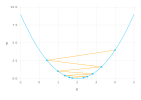

In [68]:
function f(x)
    (x-2)^2
end

function df01(x)
    2*(x-2)
end

xs = Float64[]
xy = Float64[]
x0=4;

xs=zeros(10)

for iter in 1:10
       xs[iter] = x0
       ys[iter] = f(x0)
       x0   =  x0 - 0.9 * df01(x0)
end

i=0
k=zeros(31)
l=zeros(31)
for a in -1:0.2:5
    i=i+1
    k[i]=a
    l[i]=(a-2).^2
end

plot(
layer(x=k, y=l, Geom.line()),
layer(x=xs,y=ys,Geom.point()),
layer(x=xs[1:2],y=ys[1:2],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[2:3],y=ys[2:3],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[3:4],y=ys[3:4],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[4:5],y=ys[4:5],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[5:6],y=ys[5:6],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[6:7],y=ys[6:7],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[7:8],y=ys[7:8],Geom.line(),Theme(default_color=colorant"orange")))

This can easily diverge, for example change learning rate to 1.05

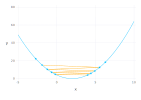

In [72]:
function f(x)
    (x-2)^2
end

function df01(x)
    2*(x-2)
end

xs = Float64[]
xy = Float64[]
x0=4;

xs=zeros(10)

for iter in 1:10
       xs[iter] = x0
       ys[iter] = f(x0)
       x0   =  x0 - 1.05 * df01(x0)
end

i=0
k=zeros(31)
l=zeros(31)
for a in -5:0.5:10
    i=i+1
    k[i]=a
    l[i]=(a-2).^2
end

plot(
layer(x=k, y=l, Geom.line()),
layer(x=xs,y=ys,Geom.point()),
layer(x=xs[1:2],y=ys[1:2],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[2:3],y=ys[2:3],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[3:4],y=ys[3:4],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[4:5],y=ys[4:5],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[5:6],y=ys[5:6],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[6:7],y=ys[6:7],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=xs[7:8],y=ys[7:8],Geom.line(),Theme(default_color=colorant"orange")))

**OLS with gradient descent**

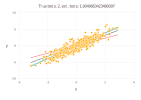

In [19]:
function df(x, y, b)
sum(- (y - x*b)' * x)
end

rnorm = Normal()
x = rand(rnorm, 500)
y = x * 2 + rand(rnorm, 500)
b    = 0.0
bold = 1.0
bvals = Float64[]

while (sum(abs(b - bold)) > 1e-10)
push!(bvals, b)
       bold = b
       der = df(x, y, bold)
       b   =  b - 0.003 * der
end

plot(Guide.title("True beta: 2, est. beta: " * string(b)),
layer(x=x, y=y, Geom.point(), Theme(default_color=colorant"orange")),
layer(x=x,y=x*bvals[3], Geom.line(), Theme(default_color=colorant"red")),
layer(x=x,y=x*bvals[5], Geom.line(), Theme(default_color=colorant"black")),
layer(x=x,y=x*bvals[8], Geom.line(), Theme(default_color=colorant"green")),
layer(x=x,y=x*b, Geom.line()))

In [20]:
b

1.9049663423480097

In [21]:
inv(x'x)x'y

1.9049663423800005

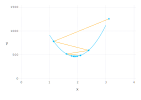

In [77]:
i=0
k=zeros(21)
l=zeros(21)
for a in 1:0.1:3
    i=i+1
    k[i]=a
    l[i]=sum((y - x*a).^2)
end

i=0
kk=zeros(10)
lgd=zeros(10)
for c in 2:11
    i=i+1
    kk[i]=bvals[c]
    lgd[i]=sum((y - x*bvals[c]).^2)
end
plot(
layer(x=k, y=l, Geom.line()),
layer(x=kk,y=lgd,Geom.point()),
layer(x=kk[1:2],y=lgd[1:2],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[2:3],y=lgd[2:3],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[3:4],y=lgd[3:4],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[4:5],y=lgd[4:5],Geom.line(),Theme(default_color=colorant"orange")))

**Beyond gradient: Jacobian and Hessian Matrices**

If we have a function $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$, then the **Jacobian** matrix $J \in \mathbb{R}^{n\, \times\, m}$ of $f$ is defined such that $J_{i,j} = \frac{\delta}{\delta x_j}f_i(x)$ and holds all partial derivatives of a function.

The **second derivative** tells us how the first derivative changes with small changes in input. It is a measurement of **curvature** andis important since it tells whether a gradient step will cause as much of an improvement as we would expect based on the gradient alone.

* $f''(x)<0 \rightarrow$ function curves **downwards**
* $f''(x)>0 \rightarrow$ function curves **upwards**

<img src="images/fig5.png" width="50%">

The **Hessian** matrix **H**(f)(**x**) is defined such that

$H(f)(x)_{i,j} = \frac{\delta^2}{\delta x_i \delta x_j}f(x)$

Hessian is the Jacobian of the gradient.

Anywhere that the second partial derivatives are continuous, the differential operators are commutative. This means that $H_{i,j} = H_{j,i}$ and the Hessian is symmetric. This is the most common case in the deep learning regime.

Hessian matrix is real and symmetric $\Rightarrow$ it can be decomposed into a set of real eigenvalues and orthogonal eigenvector basis.

Second derivative in a specific direction **d**(unit vector) is $\mathbf{d^THd}$.

When **d** is an eigenvector of H, the second derivative is the corresponding eigenvalue. In the general case, the second derivative is given by the weighted average of eigenvalues. The minimum eigenvalue determines the minimum second derivative.

The (directional) second derivative tells us how well we can expect a gradient descent step to perform. Second-order Taylor series approximation of $f(\mathbf{x})$ around the point $\mathbf{x^{(0)}}$:

$f(\mathbf{x}) \approx f(\mathbf{x^{(0)}}) + (\mathbf{x}-\mathbf{x^{(0)}})^T\mathbf{g} + \frac{1}{2}(\mathbf{x}-\mathbf{x^{(0)}})^T\mathbf{H}(\mathbf{x}-\mathbf{x^{(0)}})$ where **g** is the gradient and **H** is the Hessian

Using gradient descent, and learning rate $\epsilon$ the new point will be $(\mathbf{x^{(0)}} - \epsilon \mathbf{g})$. Substituting in the above equation:

$f(\mathbf{x^{(0)}} - \epsilon \mathbf{g}) \approx f(\mathbf{x^{(0)}}) - \epsilon \mathbf{g}^T\mathbf{g} + \frac{1}{2}\epsilon^2\mathbf{g}^T\mathbf{H}\mathbf{g}$

* Orignal function
* expected decrease due to gradient
* correction due to function curvature. 

When the last term is large, the update actually moves the point uphill. When it is zero or negative, the equation gives that larger $\epsilon$ will always decrease the function value, however, moving too far from $\mathbf{x^{(0)}}$ will invalidate the Taylor approximation. 

At critical point, where $f'(x) = 0$, the second derivative can be used to determine local maximum or minimum. This is **second derivative test**

| $f''(x)\, $ | conclusion |
| --- | --- |
|  $>0$ | local minimum |
|  $<0$ | local maximum |
|  $=0$ | inconclusive |

In multiple dimensions, for Hessian matrix:

| eigenvalue | conclusion |
| --- | --- |
| all positive | local minimum |
| all negative | local maximum |
| atleast one positive and negative each | saddle |
| all non-zero same sign, atleast one zero | inconclusive |

<img src="images/saddle.png" width="30%">



**M<ultiple dimensions: 2D optimisation**

Sems to work

In [23]:
function f(x, y)
    2*x^2+y^2
end

function df01(x)
    4*x
end

function df02(y)
    2*y
end

xs = Float64[]
x0=1
y0=1

xs=zeros(10)
ys=zeros(10)

for iter in 1:10
       xs[iter] = x0;
       ys[iter] = y0;
       x0   =  x0 - 0.4 * df01(x0)
       y0   =  y0 - 0.4 * df02(y0)
end

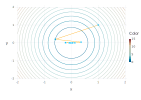

In [24]:
plot(
    layer(z=(x,y) -> 2*x^2+y^2, x=linspace(-2,2,30), y=linspace(-2,2,30), Geom.contour),
    layer(x=xs,y=ys,Geom.point()),
    layer(x=xs[1:2],y=ys[1:2],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[2:3],y=ys[2:3],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[3:4],y=ys[3:4],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[4:5],y=ys[4:5],Geom.line(),Theme(default_color=colorant"orange"))
)

But in more dimensions there is different second derivative for each directin at a single point. The condition number tells how much second derivatives differ from each other.

bad conditioning means that they do not differ much and gradient descent works poorly.

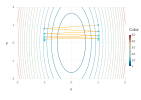

In [74]:
function f(x, y)
    10*x^2+y^2
end

function df01(x)
    20*x
end

function df02(y)
    2*y
end

xs = Float64[]
x0=1
y0=1

xs=zeros(10)
ys=zeros(10)

for iter in 1:10
       xs[iter] = x0;
       ys[iter] = y0;
       x0   =  x0 - 0.1 * df01(x0)
       y0   =  y0 - 0.1 * df02(y0)
end

plot(
    layer(z=(x,y) -> 10*x^2+y^2, x=linspace(-2,2,30), y=linspace(-2,2,30), Geom.contour),
    layer(x=xs,y=ys,Geom.point()),
    layer(x=xs[1:2],y=ys[1:2],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[2:3],y=ys[2:3],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[3:4],y=ys[3:4],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[4:5],y=ys[4:5],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[5:6],y=ys[5:6],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[6:7],y=ys[6:7],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[7:8],y=ys[7:8],Geom.line(),Theme(default_color=colorant"orange"))
)

When the Hessian has a poor condition number, gradient descent performs poorly, as it is confused between one direction where the gradient increases significantly, and another direction where it increases slowly. Gradient descent is unaware of this change in the derivative, so it does not know that it needs to explore preferentially in the direction where the derivative remains negative for longer.

**Newton’s method**

This can be resolved by using information from the Hessian matrix to guide the search. Simplest method is **Newton's method** based on second degree Taylor expansion.

$f(\mathbf{x}) = f(\mathbf{x^{(0)}}) + (\mathbf{x}-\mathbf{x^{(0)}})^T\nabla_xf(\mathbf{x^{(0)}}) + \frac{1}{2}(\mathbf{x}-\mathbf{x^{(0)}})^T\mathbf{H}(f)(\mathbf{x^{(0)}})(\mathbf{x}-\mathbf{x^{(0)}})$

Taking gradient wrt **x** and setting L.H.S. to zero:

$0 = \nabla_xf(\mathbf{x^{(0)}}) + \mathbf{H}(f)(\mathbf{x^{(0)}})\mathbf{x} - \mathbf{H}(f)(\mathbf{x^{(0)}})\mathbf{x^{(0)}}$

$\mathbf{x} = \mathbf{x^{(0)}} - \mathbf{H}(f)(\mathbf{x^{(0)}})^{-1}\nabla_xf(\mathbf{x^{(0)}})$

This method consists of iteratively jumping to the minimum of a locally approximated quadratic function $\rightarrow$ converges faster than gradient descent. However, unlike gradient descent, solution of Newton's method is attracted to saddle points as well.

**Algorithms**

* **first-order optimization algorithms** that use only the gradient, such as gradient descent
* **second-order optimization algorithms** that also use the Hessian matrix, such as Newton’s method


To treat functions in deep learning, we assume that they are Lipschitz continuous or have lipschitz continuous derivatives. (weak constraint) A **Lipschitz continuous** function satisfies for a Lipschitz constant $\mathcal{L}$ the bound:

$\forall \mathbf{x}\, ,\forall \mathbf{y}\, ,|f(\mathbf{x}) - f(\mathbf{y})| \leq \mathcal{L}||\mathbf{x}-\mathbf{y}||_2$

This property is useful because it enables us to quantify our assumption that a small change in the input made by an algorithm such as gradient descent will have a small change in the output.

**Convex optimization** algorithms are able to provide many more guarantees by making stronger restrictions. These algorithms are applicable only to convex functions—functions for which the Hessian is positive semideﬁnite everywhere. It is sometimes used as a subroutine in deep learning algorithms.

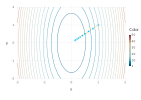

In [73]:
function f(x, y)
    10*x^2+y^2
end

function df0(x,y)
    [20*x 2*y]'
end

xs = Float64[]
x0=[1 1]'

xs=zeros(10)
ys=zeros(10);

for iter in 1:10
       xs[iter] = x0[1];
       ys[iter] = x0[1];
       x0   =  x0 - 0.1 * inv([[10 0];[0 1]])*df0(x0[1],x0[2])
end

plot(
    layer(z=(x,y) -> 10*x^2+y^2, x=linspace(-2,2,30), y=linspace(-2,2,30), Geom.contour),
    layer(x=xs,y=ys,Geom.point()),
    layer(x=xs[1:2],y=ys[1:2],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[2:3],y=ys[2:3],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[3:4],y=ys[3:4],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[4:5],y=ys[4:5],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[5:6],y=ys[5:6],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[6:7],y=ys[6:7],Geom.line(),Theme(default_color=colorant"orange")),
    layer(x=xs[7:8],y=ys[7:8],Geom.line(),Theme(default_color=colorant"orange"))
)

#### Newton's method for OLS

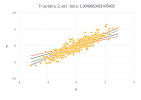

In [27]:
function df1(x, y, b1)
sum(- (y - x*b1)' * x)
end

function df2(x)
    sum(x.^2)
end

b1    = 0.0
bold1 = 1.0
bvals1 = Float64[]

while (sum(abs(b1 - bold1)) > 1e-10)
push!(bvals1, b1)
       bold1 = b1
       der1 = df1(x, y, bold1)
       der2 = df2(x)
       b1   =  b1 - 0.3 * der1/der2
end

plot(Guide.title("True beta: 2, est. beta: " * string(b1)),
layer(x=x, y=y, Geom.point(), Theme(default_color=colorant"orange")),
layer(x=x,y=x*bvals1[3], Geom.line(), Theme(default_color=colorant"red")),
layer(x=x,y=x*bvals1[4], Geom.line(), Theme(default_color=colorant"black")),
layer(x=x,y=x*bvals1[6], Geom.line(), Theme(default_color=colorant"green")),
layer(x=x,y=x*bvals1[10], Geom.line(), Theme(default_color=colorant"red")),
layer(x=x,y=x*b, Geom.line()))

In [28]:
b

1.9049663423480097

In [29]:
b1

1.9049663421476402

In [30]:
inv(x'x)x'y

1.9049663423800005

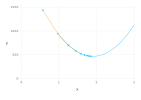

In [31]:
i=0
k=zeros(21)
l=zeros(21)
for a in 1:0.1:3
    i=i+1
    k[i]=a
    l[i]=sum((y - x*a).^2)
end

i=0
kk=zeros(10)
lgd=zeros(10)
for c in 2:11
    i=i+1
    kk[i]=bvals1[c]
    lgd[i]=sum((y - x*bvals1[c]).^2)
end
plot(
layer(x=k, y=l, Geom.line()),
layer(x=kk,y=lgd,Geom.point()),
layer(x=kk[1:2],y=lgd[1:2],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[2:3],y=lgd[2:3],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[3:4],y=lgd[3:4],Geom.line(),Theme(default_color=colorant"orange")),
layer(x=kk[4:5],y=lgd[4:5],Geom.line(),Theme(default_color=colorant"orange")))

### Constrained Optimization

It might be the case that although we want to maximize (or minimize) $f(x)$, but aren't allowed to use all possible values of $x$, say $x \in \mathbb{S}$, for some set $\mathbb{S}$. This now becomes a problem of **Constrained Optimization**. The points $\mathbf{x}$ in $S$ are called **feasible points**. 

An example of such a constraint can be the L2-norm constraint, e.g. $|| \hspace{.1cm} x \hspace{.1cm}||^2 < 1$. This is useful as we often want the values for our weights to be small (i.e. close to $0$).

*Approach*: Design a separate, unconstrained optimization problem, whose solution can be converted to the original constrained optimization problem. E.g. in the above described constrained optimization problem, we could instead minimize:
$$g(\theta) = f([\cos\theta, \sin\theta]^T)$$

with respect to $\theta$ and return ($\cos\theta, \sin\theta$).


General solution: **Karush–Kuhn–Tucker(KKT)** approach which introduces a **generalized Lagrangian**.

Approach: 

We use $m$ functions $g^{(i)}(x)$ and $n$ functions $h^{(j)}(x)$ to describe $\mathbb{S}$,  such that any element $x \in \mathbb{S}$ satisfies: 
$$g^{(i)}(x) = 0 \hspace{.1cm} \text{and} \hspace{.1cm} h^{(j)}(x) \leq 0 \hspace{.1cm} \forall \hspace{.1cm} i, j$$

There are two constraints specified here. I'll explain them with an example. Let's take $g(x)$ as $x - 2$ and $h(x)$ as $x-3$. <br>
Then for $x = 2$, we have the following:

- **Equality constraints**: $g^{(i)}(x) = 0$. Here, $g(2) = 0$. Hence, $x = 2$ satisfies the equality constraints.
- **Inequality constraints**: $h^{(i)}(x) \leq 0$. Here, $h(2) = -1 < 0$. Hence, $x = 2$ satisfies the inequality constraints.

Note that for $x = 3$, $h(x)$ is an equality constraint that it satisfies whereas $g(x)$ is neither.

New paramaters (called KKT multipliers): $\lambda_i$, $\alpha_j$ for each constraint.  <br>
Generalized Lagrangian:


![lagrangian](images/Lagrangian.png)

Now, let: $Y =\max\limits_{\alpha} \max\limits_{\lambda} L(x, \lambda, \alpha)$
Then, $\min\limits_x(f(x)) = \min\limits_x(Y)$

This is because, if the constraints are satisfied, $Y = f(x)$ and if it isn't, $Y = \infty$. This ensures that only feasible points are optimal. For finding the maximum of f(x), we can use the same generalized Lagrangian applied on $-f(x)$. 

The inequality constraints need to be observed more closely. Suppose the optimal point comes out to be $x^*$. If $h^{(i)}(x^*) = 0$, then the constraint is said to be **active**. However, if the constraint is inactive, i.e. $h^{(i)}(x^*) < 0$, then even if we remove the constraint, $x^*$ continues to be a local solution. Also, by definition, an inactive $h^{(i)}$ is negative and hence $\max\limits_{\alpha} \max\limits_{\lambda} L(x, \lambda, \alpha) \Rightarrow \alpha_i = 0$. Thus, either $\alpha_i = 0$ or $h^{(i)}(x^*) = 0$ (in the case of active constraint). Hence, $\mathbf{\alpha} \odot h{(x)} = 0$.

Intuition: 

The relation of the optimal point can satisfy only of these two conditions:

- The point is at the boundary of the constraint (i.e. active), then the corresponding KKT multiplier should be used.

- The constraint has no influence in the evaluation of the point and hence, the corresponding KKT multiplier is zeroed out.

The optimal points satisfy the following KKT conditions, which are necessary but not always sufficient:

![kkt](images/kkt.png)